In [1]:
from apts import *
%matplotlib inline  

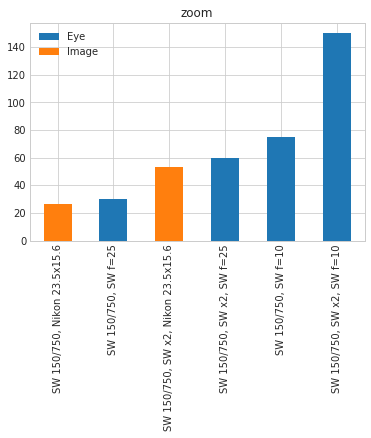

In [2]:
e = Equipment()

sky_watcher = "SW"

e.register(equipment.Camera(23.5, 15.6, 6000, 4000, "Nikon"))
e.register(equipment.Telescope(150, 750, sky_watcher, t2_output = True))
e.register(equipment.Barlow(2, sky_watcher, t2_output = True))
#e.register(equipment.Barlow(3, sky_watcher, t2_output = True))
e.register(equipment.Eyepiece(25, sky_watcher))
e.register(equipment.Eyepiece(10, sky_watcher))
#e.register(equipment.Eyepiece(6, sky_watcher))

e.plot('zoom')

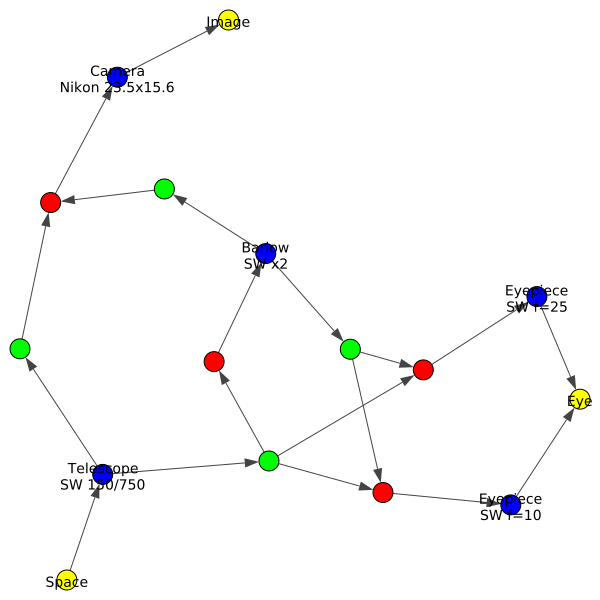

In [3]:
e.plot_connection_garph()

In [4]:
data = e.data()
data[data.useful_zoom == True].sort_values(['fov'], ascending=[0])

,label,type,zoom,useful_zoom,fov,range,brightness,elements
2,"SW 150/750, SW f=25",Eye,30.00000,True,1.733333,12.880456,51.020408,2
5,"SW 150/750, Nikon 23.5x15.6",Image,26.58956,True,1.191840,12.880456,64.947755,2
0,"SW 150/750, SW x2, SW f=25",Eye,60.00000,True,0.866667,12.880456,12.755102,3
3,"SW 150/750, SW f=10",Eye,75.00000,True,0.693333,12.880456,8.163265,2
4,"SW 150/750, SW x2, Nikon 23.5x15.6",Image,53.17912,True,0.595920,12.880456,16.236939,3
1,"SW 150/750, SW x2, SW f=10",Eye,150.00000,True,0.346667,12.880456,2.040816,3


In [5]:
observations.Conditions.MIN_TEMPERATURE = -10

place = Place(lat=50.1637973, lon=19.7855169, name="Example place")
o = Observation(place,e)

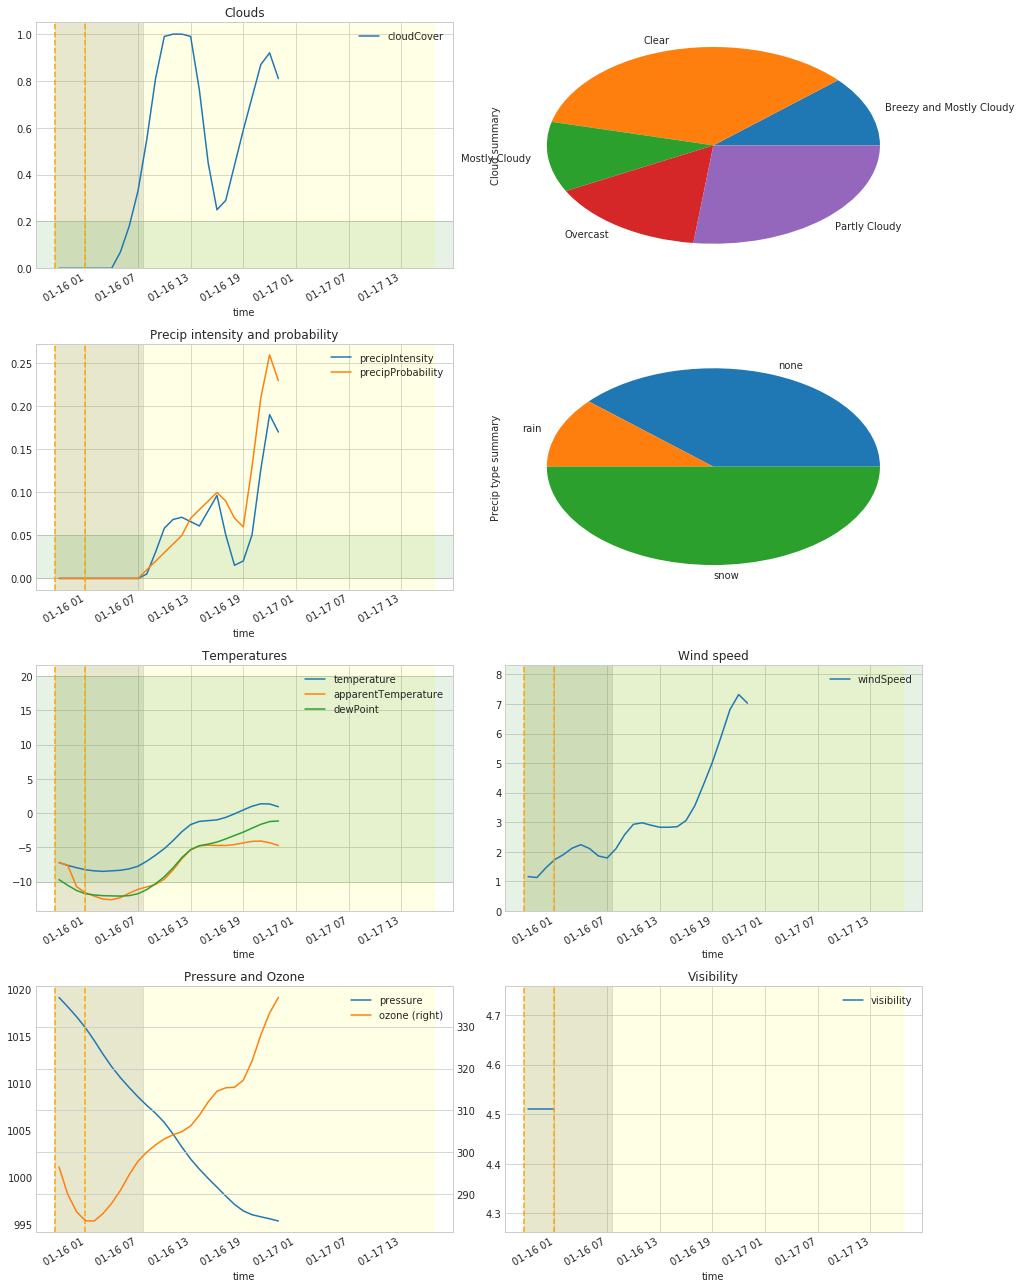

In [6]:
o.plot_weather()

In [7]:
o.weather_is_good()

True

In [8]:
n = Notify('lpozarlik@gmail.com')
n.send(o)

In [9]:
o.local_planets.objects

,Name,Transit,Altitude,Magnitude,RA,Dec,Distance,Phase
0,"<Mercury ""Mercury"" at 0x7fa508e0d7f0>",2018-01-17 10:31:10.917159+01:00,16.438413,-0.19,18.622586,-23.451515,1.264484,86.308968
1,"<Venus ""Venus"" at 0x7fa508e0d978>",2018-01-17 11:59:59.929466+01:00,18.573082,-3.78,20.106920,-21.310295,1.710281,99.932190
2,"<Mars ""Mars"" at 0x7fa508e0db00>",2018-01-17 07:22:47.546903+01:00,21.794278,1.34,15.474165,-18.081567,1.809350,92.045616
3,"<ephem.Jupiter ""Jupiter"" at 0x7fa507fc0310>",2018-01-17 07:03:36.072682+01:00,23.322924,-1.74,15.153435,-16.550044,5.727424,99.293159
4,"<ephem.Saturn ""Saturn"" at 0x7fa507fc0480>",2018-01-17 10:08:02.730876+01:00,17.376783,0.53,18.235923,-22.510073,10.956228,99.960640
5,"<Uranus ""Uranus"" at 0x7fa508e0dc88>",2018-01-16 17:28:48.763633+01:00,48.878312,5.81,1.536446,9.028273,19.908278,99.938934
6,"<Neptune ""Neptune"" at 0x7fa508e0de10>",2018-01-17 14:49:20.110154+01:00,32.087218,7.94,22.936920,-7.774267,30.632797,99.986534


In [10]:
o.get_visible_messier()

,Messier,Name,NGC,Type,Constellation,Magnitude,Distance,RA,Dec,Width,Height,Transit,Altitude
40,M41,-,NGC 2287,Open Cluster,Canis Major,4.6,2300,6.783333,-20.733333,38.0,38.0,2018-01-15 22:47:29.195457+01:00,19.124987
49,M50,-,NGC 2323,Open Cluster,Monocerus,6.3,3000,7.053333,-8.333333,16.0,16.0,2018-01-15 23:03:43.914458+01:00,31.498589
46,M47,-,NGC 2422,Open Cluster,Puppis,5.2,1600,7.610000,-14.500000,30.0,30.0,2018-01-15 23:37:00.258260+01:00,25.326232
45,M46,-,NGC 2437,Open Cluster,Puppis,6.0,5400,7.696667,-14.816667,27.0,27.0,2018-01-15 23:42:11.343092+01:00,25.008063
92,M93,-,NGC 2447,Open Cluster,Puppis,6.0,3600,7.743333,-23.866667,22.0,22.0,2018-01-15 23:44:55.243690+01:00,15.978483
47,M48,-,NGC 2548,Open Cluster,Hydra,5.5,1500,8.230000,-5.800000,54.0,54.0,2018-01-16 00:14:09.670424+01:00,34.002348
43,M44,Beehive Cluster (Praesepe),NGC 2632,Open Cluster,Cancer,3.7,577,8.668333,19.983333,95.0,95.0,2018-01-16 00:40:31.873341+01:00,59.761826
66,M67,-,NGC 2682,Open Cluster,Cancer,6.1,2700,8.840000,11.816667,30.0,30.0,2018-01-16 00:50:45.206509+01:00,51.595348


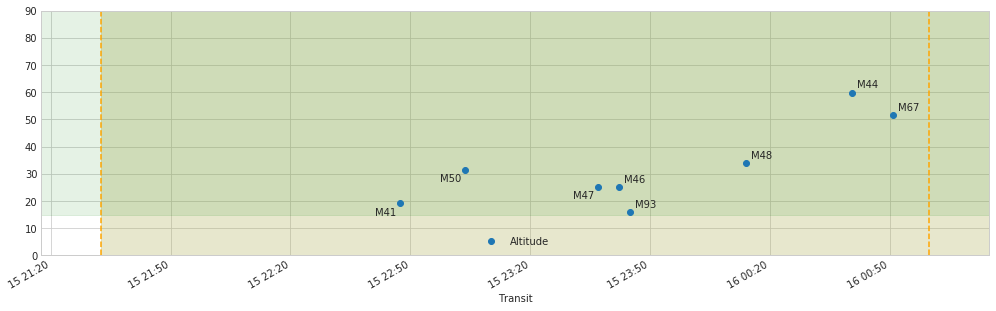

In [11]:
o.plot_messier()

In [12]:
#o.get_visible_messier().to_html('/tmp/list.html')

In [13]:
import numpy as np
import time
from datetime import datetime
import ephem
# Always get the latest ISS TLE data from:
# http://spaceflight.nasa.gov/realdata/sightings/SSapplications/Post/JavaSSOP/orbit/ISS/SVPOST.html
iss = ephem.readtle('ISS',
    '1 25544U 98067A   17289.56535255  .00016717  00000-0  10270-3 0  9000',
    '2 25544  51.6389 153.2478 0004983  22.1446 337.9921 15.54200052   623'
)
#while True:
#    o.place.date = datetime.utcnow()
#    iss.compute(o.place)
#    print('iss: altitude %4.1f deg, azimuth %5.1f deg' % (np.degrees(iss.alt), np.degrees(iss.az)))
#    time.sleep(1.0)